Football Prediction - Regression Analysis
1. Defining the Question

a) Specifying the Question

Mchezopesa Ltd and tasked to accomplish the task below. A prediction result of a game between team 1 and team 2, based on who's home and who's away, and on whether or not the game is friendly (include rank in your training). You have two possible approaches (as shown below) given the datasets that will be provided

Input: Home team, Away team, Tournament type (World cup, Friendly, Other)

**Approach 1: Polynomial approach**

What to train given:

Rank of home team
Rank of away team
Tournament type
Model 1: Predict how many goals the home team scores.

Model 2: Predict how many goals the away team scores.

**Approach 2: Logistic approach**

Feature Engineering: Figure out from the home team’s perspective if the game is a Win, Lose or Draw (W, L, D)

b) Defining the Metric for Success
Using Polynomial regression, the Root Mean Squared Error will be used to measure the performace of the model.

The prediction of model using logistic regression model will be measured using the accuracy score

c) Understanding the context

As a data analyst at Mchezo Ltd, the following task is required of you: Make a prediction of a game between team 1 and team 2 , based on who's home and who is
away and on whether or not the game is friendly.

A more detailed explanation and history of the rankings is available here: [link text](https://en.wikipedia.org/wiki/FIFA_World_Rankings)

An explanation of the ranking procedure is available here: [link text](https://www.fifa.com/fifa-world-ranking/procedure/men.html)

Some features are available on the FIFA ranking page: [link text](https://https://www.fifa.com/fifa-world-ranking/ranking-table/men/index.html)

d) Recording the Experimental Design

Perform appropriate regressions on the data including your justification
Challenge your solution by providing insights on how you can make improvements.

*   Perform your EDA
*   Perform any necessary feature engineering

*   Check of multicollinearity
*   Cross-validate the model

*   Compute RMSE
*   Create residual plots for your models, and assess their heteroscedasticity using Bartlett’s test








In [1]:
# Import Libraries

# Analysis libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Machine learning libraries
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, cross_val_score
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, f1_score, accuracy_score, confusion_matrix

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
# Loading the Datasets

# Fifa dataset
rank = pd.read_csv('fifa_ranking.csv')

# results dataset
results = pd.read_csv('results.csv')

In [3]:
# Previewing the top of our dataset
rank.head()

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
0,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
1,2,Italy,ITA,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
2,3,Switzerland,SUI,0.0,50,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
3,4,Sweden,SWE,0.0,55,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
4,5,Argentina,ARG,0.0,51,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08


In [4]:
results.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


In [5]:
# getting the info
rank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57793 entries, 0 to 57792
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   rank                     57793 non-null  int64  
 1   country_full             57793 non-null  object 
 2   country_abrv             57793 non-null  object 
 3   total_points             57793 non-null  float64
 4   previous_points          57793 non-null  int64  
 5   rank_change              57793 non-null  int64  
 6   cur_year_avg             57793 non-null  float64
 7   cur_year_avg_weighted    57793 non-null  float64
 8   last_year_avg            57793 non-null  float64
 9   last_year_avg_weighted   57793 non-null  float64
 10  two_year_ago_avg         57793 non-null  float64
 11  two_year_ago_weighted    57793 non-null  float64
 12  three_year_ago_avg       57793 non-null  float64
 13  three_year_ago_weighted  57793 non-null  float64
 14  confederation         

In [7]:
results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40839 entries, 0 to 40838
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   date        40839 non-null  object
 1   home_team   40839 non-null  object
 2   away_team   40839 non-null  object
 3   home_score  40839 non-null  int64 
 4   away_score  40839 non-null  int64 
 5   tournament  40839 non-null  object
 6   city        40839 non-null  object
 7   country     40839 non-null  object
 8   neutral     40839 non-null  bool  
dtypes: bool(1), int64(2), object(6)
memory usage: 2.5+ MB


In [13]:
rank.isnull().sum()

rank                       0
country_full               0
country_abrv               0
total_points               0
previous_points            0
rank_change                0
cur_year_avg               0
cur_year_avg_weighted      0
last_year_avg              0
last_year_avg_weighted     0
two_year_ago_avg           0
two_year_ago_weighted      0
three_year_ago_avg         0
three_year_ago_weighted    0
confederation              0
rank_date                  0
dtype: int64

In [15]:
results.isnull().sum()

date          0
home_team     0
away_team     0
home_score    0
away_score    0
tournament    0
city          0
country       0
neutral       0
dtype: int64

In [16]:
# check 
rank.duplicated().sum()

37

In [20]:
# drop duplicate in rank
rank.drop_duplicates(inplace=True)
rank.duplicated().sum()

0

In [17]:
# drop duplicate in results
results.duplicated().sum()

0

In [9]:
# selecting all non-objects data 
cols = rank.dtypes[rank.dtypes != "object"].index 
cols

Index(['rank', 'total_points', 'previous_points', 'rank_change',
       'cur_year_avg', 'cur_year_avg_weighted', 'last_year_avg',
       'last_year_avg_weighted', 'two_year_ago_avg', 'two_year_ago_weighted',
       'three_year_ago_avg', 'three_year_ago_weighted'],
      dtype='object')

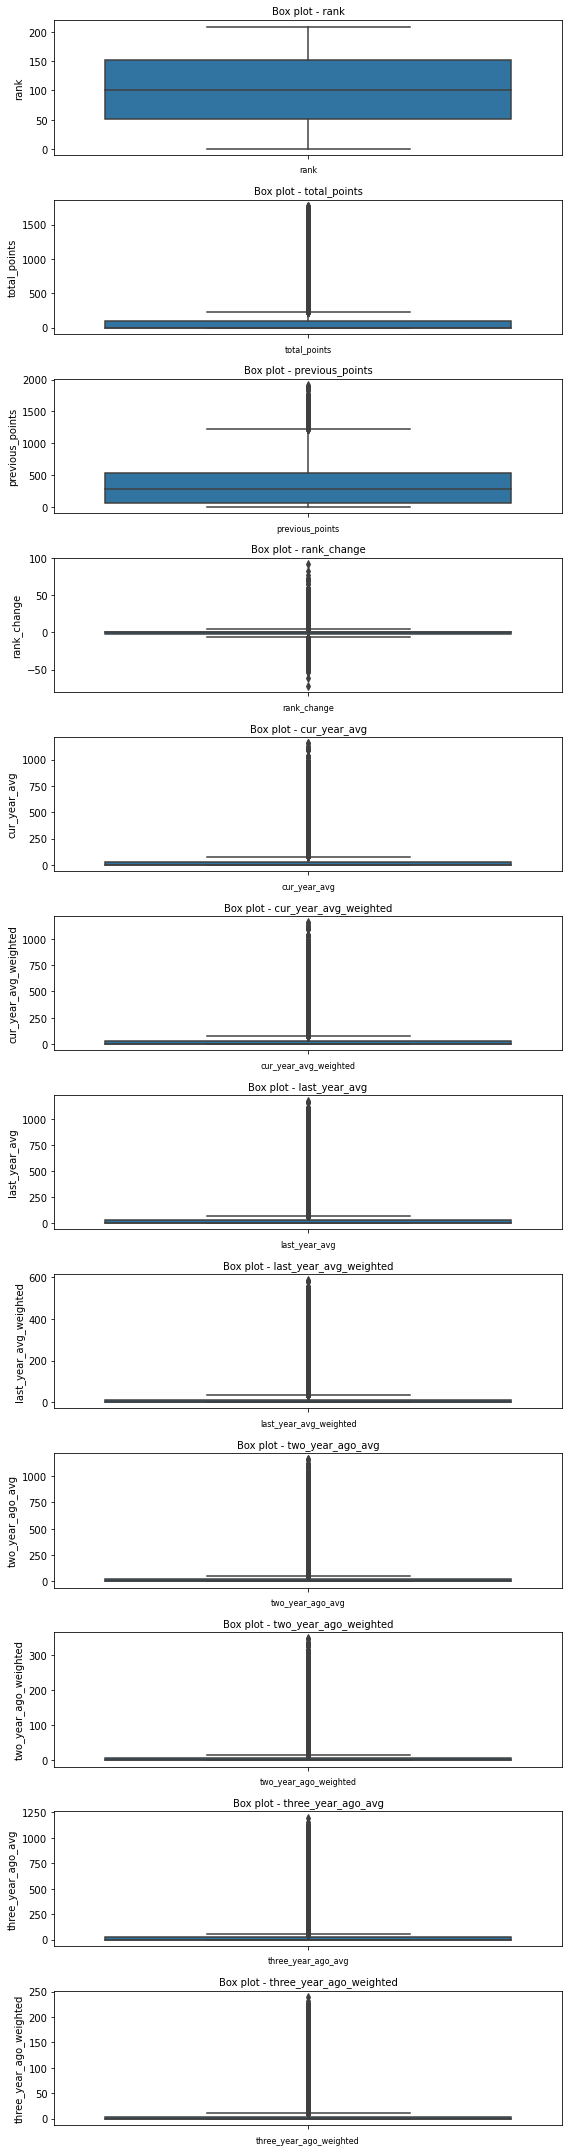

In [11]:
# Checking for Outliers
# Ranking Dataset
fig, ax = plt.subplots(len(cols), figsize=(8,30))
for i, col_val in enumerate(cols):
    sns.boxplot(y=rank[col_val], ax=ax[i])
    ax[i].set_title('Box plot - {}'.format(col_val), fontsize=10)
    ax[i].set_xlabel(col_val, fontsize=8)
plt.tight_layout()
plt.show()

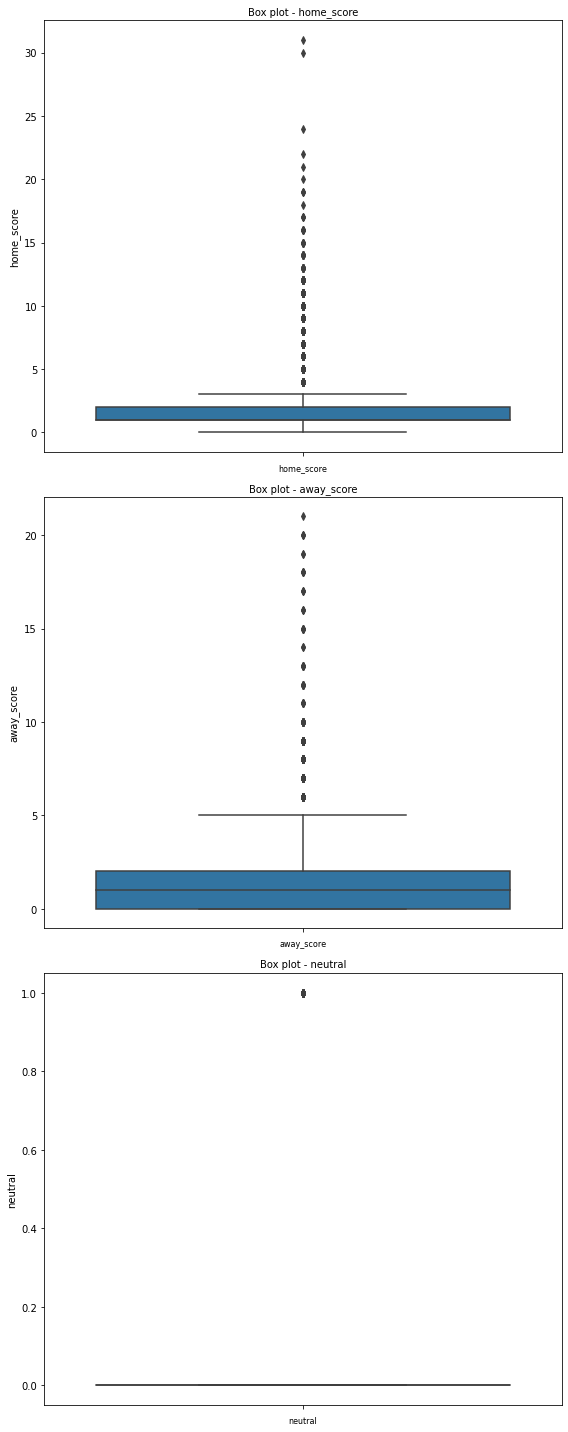

In [12]:
# Checking for outliers
# Results dataset
cols_re = results.dtypes[results.dtypes != "object"].index 
fig, ax = plt.subplots(len(cols_re), figsize=(8,20))
for i, col_val in enumerate(cols_re):
    sns.boxplot(y=results[col_val], ax=ax[i])
    ax[i].set_title('Box plot - {}'.format(col_val), fontsize=10)
    ax[i].set_xlabel(col_val, fontsize=8)
plt.tight_layout()
plt.show()

In [0]:
# Changing the date column data type to datetime#

rank['rank_date'] = pd.to_datetime(rank['rank_date'])
results['date'] = pd.to_datetime(results['date'])

In [0]:
# Create new columns and split the date colums into month and year.
#
# For the year columns
rank['year'] = rank['rank_date'].dt.year
results['year'] = results['date'].dt.year

# Now for the month columns
rank['month'] = rank['rank_date'].dt.month
results['month'] = results['date'].dt.month

In [0]:
# Dropping irrelevant columns in rank dataset
rank_clean = rank.drop(['country_abrv', 'total_points',
       'previous_points', 'rank_change', 'cur_year_avg',
       'cur_year_avg_weighted', 'last_year_avg', 'last_year_avg_weighted',
       'two_year_ago_avg', 'two_year_ago_weighted', 'three_year_ago_avg',
       'three_year_ago_weighted',], axis=1)

results_clean =results.drop(['city', 'country' ], axis=1)

In [26]:
rank_clean.head()

,rank,country_full,confederation,rank_date,year,month
0,1,Germany,UEFA,1993-08-08,1993,8
1,2,Italy,UEFA,1993-08-08,1993,8
2,3,Switzerland,UEFA,1993-08-08,1993,8
3,4,Sweden,UEFA,1993-08-08,1993,8
4,5,Argentina,CONMEBOL,1993-08-08,1993,8


In [27]:
results_clean.head()

,date,home_team,away_team,home_score,away_score,tournament,neutral,year,month
0,1872-11-30,Scotland,England,0,0,Friendly,False,1872,11
1,1873-03-08,England,Scotland,4,2,Friendly,False,1873,3
2,1874-03-07,Scotland,England,2,1,Friendly,False,1874,3
3,1875-03-06,England,Scotland,2,2,Friendly,False,1875,3
4,1876-03-04,Scotland,England,3,0,Friendly,False,1876,3


In [0]:
# Merging the dataset
# Home Team dataset

total_home = pd.merge(results_clean, rank_clean,  left_on = ['home_team', 'year', 'month'], 
                     right_on = ['country_full', 'year', 'month'],  how = 'inner' )

In [0]:
# Merging the dataset
# Away Team dataset

total_away = pd.merge(results_clean, rank_clean, how = 'inner', left_on = ['year', 'month', 'away_team'], 
                     right_on = ['year', 'month', 'country_full'])

In [0]:
# Renaming the ranks columns to get the home team and away team ranks
#
total_home.rename({'rank' : 'home_rank'}, axis = 1, inplace = True)
total_away.rename({'rank' : 'away_rank'}, axis =1, inplace = True)

In [35]:
away = total_away[['away_team','away_rank','year','month']]
away.head()

,away_team,away_rank,year,month
0,Paraguay,67,1993,8
1,Paraguay,67,1993,8
2,Argentina,5,1993,8
3,Argentina,5,1993,8
4,Argentina,5,1993,8


In [36]:
total_df = pd.merge(total_home, away, how = 'inner', left_on = ['year', 'month', 'away_team'], right_on = ['year', 'month', 'away_team'])

total_df.head()

,date,home_team,away_team,home_score,away_score,tournament,neutral,year,month,home_rank,country_full,confederation,rank_date,away_rank
0,1993-08-01,Colombia,Paraguay,0,0,FIFA World Cup qualification,False,1993,8,19,Colombia,CONMEBOL,1993-08-08,67
1,1993-08-01,Colombia,Paraguay,0,0,FIFA World Cup qualification,False,1993,8,19,Colombia,CONMEBOL,1993-08-08,67
2,1993-08-29,Argentina,Paraguay,0,0,FIFA World Cup qualification,False,1993,8,5,Argentina,CONMEBOL,1993-08-08,67
3,1993-08-29,Argentina,Paraguay,0,0,FIFA World Cup qualification,False,1993,8,5,Argentina,CONMEBOL,1993-08-08,67
4,1993-08-15,Colombia,Argentina,2,1,FIFA World Cup qualification,False,1993,8,19,Colombia,CONMEBOL,1993-08-08,5


In [37]:
total_df = total_df.drop(['date','country_full','rank_date','confederation'], 1)
total_df.head()

,home_team,away_team,home_score,away_score,tournament,neutral,year,month,home_rank,away_rank
0,Colombia,Paraguay,0,0,FIFA World Cup qualification,False,1993,8,19,67
1,Colombia,Paraguay,0,0,FIFA World Cup qualification,False,1993,8,19,67
2,Argentina,Paraguay,0,0,FIFA World Cup qualification,False,1993,8,5,67
3,Argentina,Paraguay,0,0,FIFA World Cup qualification,False,1993,8,5,67
4,Colombia,Argentina,2,1,FIFA World Cup qualification,False,1993,8,19,5


In [0]:
# Dropping duplicate rows from the dataset
total_df.drop_duplicates(keep = 'first', inplace = True)

In [39]:
total_df.isnull().sum()

home_team     0
away_team     0
home_score    0
away_score    0
tournament    0
neutral       0
year          0
month         0
home_rank     0
away_rank     0
dtype: int64

In [0]:
# 0 means a draw
# A positive value means the home team won
# A negative value means the away team won, ie. that the home team lost.
#
total_df['score'] = total_df['home_score'] - total_df['away_score']

In [43]:
# Creating a function to be used to create a win, draw or lose column
#
def result(goals):
  if goals > 0:
    return 'Win'
  elif goals < 0:
    return 'Lose'
  else:
    return 'Draw'
# Applying the result function to the dataframe
total_df['result'] = total_df['score'].apply(lambda x: result(x))

# Dropping the score column, as it has served its purpose
#total_df.drop('score', axis = 1, inplace = True)

# Creating a column of total goals scored
total_df['total_goals'] = total_df['home_score'] + total_df['away_score']

# Previewing the last five rows of the dataframe together with the result column
#
total_df.tail()

,home_team,away_team,home_score,away_score,tournament,neutral,year,month,home_rank,away_rank,result,total_goals,score
28432,Tunisia,England,1,2,FIFA World Cup,True,2018,6,21,12,Lose,3,-1
28433,Japan,Paraguay,4,2,Friendly,True,2018,6,61,32,Win,6,2
28434,Japan,Poland,0,1,FIFA World Cup,True,2018,6,61,8,Lose,1,-1
28435,Argentina,Iceland,1,1,FIFA World Cup,True,2018,6,5,22,Draw,2,0
28437,Nigeria,Iceland,2,0,FIFA World Cup,True,2018,6,48,22,Win,2,2


EDA

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f0decce90b8>],
      dtype=object)

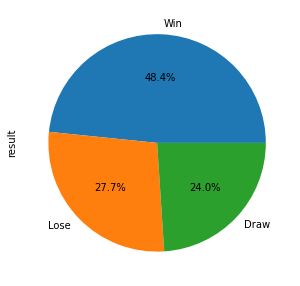

In [48]:
# Pie chart to check the distribution of W,D,L
total_df['result'].value_counts().plot(kind='pie', subplots=True, figsize=(10, 5), autopct='%1.1f%%')

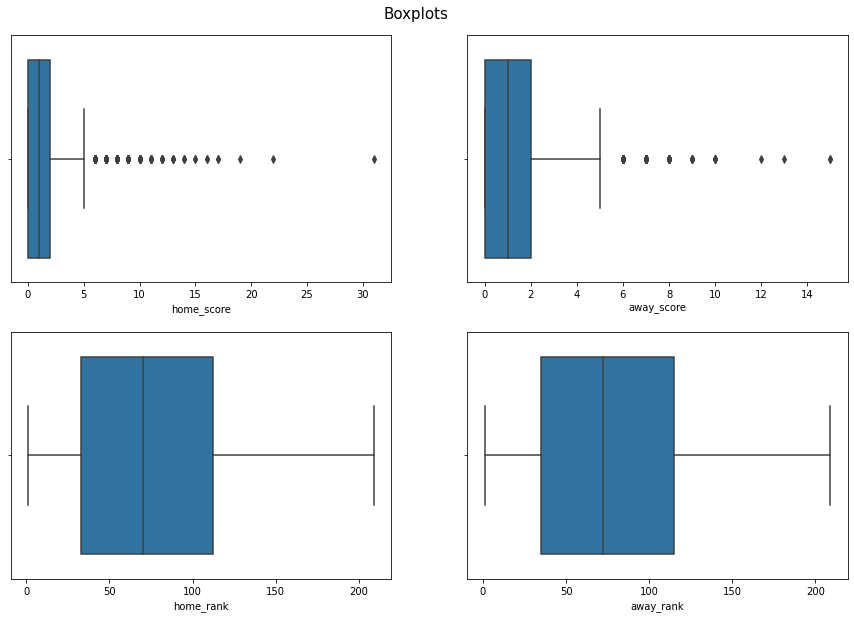

In [53]:
# Ploting the univariate summaries and recording our observations
# Boxplots

# Creating a list of columns to check for outliers
# Creating a list of colors
#
col_list = ['home_score', 'away_score', 'home_rank', 'away_rank']

# Plotting boxplots of the col_list columns to check for outliers
#
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (15, 10))
plt.suptitle('Boxplots', fontsize = 15, y = 0.92)
for ax, data, column, color in zip(axes.flatten(), total_df, col_list, colors):
  sns.boxplot(total_df[column], ax = ax)

Regression

In [0]:
# Polynomial
# choosing columns to use in regression
#
reg_total = total_df[['home_team',	'away_team',	'home_score',	'away_score',	'tournament', 'home_rank', 'away_rank']]
reg_total.head()

,home_team,away_team,home_score,away_score,tournament,home_rank,away_rank
0,Colombia,Paraguay,0,0,FIFA World Cup qualification,19,67
2,Argentina,Paraguay,0,0,FIFA World Cup qualification,5,67
4,Colombia,Argentina,2,1,FIFA World Cup qualification,19,5
7,Peru,Argentina,0,1,FIFA World Cup qualification,70,5
10,Paraguay,Argentina,1,3,FIFA World Cup qualification,67,5


In [55]:
# Displaying the correlations between the variables
corr = reg_total.corr()
corr

,home_score,away_score,home_rank,away_rank
home_score,1.000000,-0.163729,-0.135415,0.318738
away_score,-0.163729,1.000000,0.221711,-0.179898
home_rank,-0.135415,0.221711,1.000000,0.469472
away_rank,0.318738,-0.179898,0.469472,1.000000


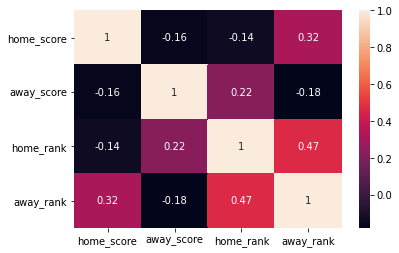

In [74]:
sns.heatmap(corr, annot=True)

In [56]:
# multicollinearity with VIF table
pd.DataFrame(np.linalg.inv(corr.values), index = corr.index, columns=corr.columns)


,home_score,away_score,home_rank,away_rank
home_score,1.259222,-0.008262,0.463670,-0.620529
away_score,-0.008262,1.180140,-0.466493,0.433943
home_rank,0.463670,-0.466493,1.635457,-0.999512
away_rank,-0.620529,0.433943,-0.999512,1.745094


In [57]:
reg_total.head()

,home_team,away_team,home_score,away_score,tournament,home_rank,away_rank
0,Colombia,Paraguay,0,0,FIFA World Cup qualification,19,67
2,Argentina,Paraguay,0,0,FIFA World Cup qualification,5,67
4,Colombia,Argentina,2,1,FIFA World Cup qualification,19,5
7,Peru,Argentina,0,1,FIFA World Cup qualification,70,5
10,Paraguay,Argentina,1,3,FIFA World Cup qualification,67,5


In [58]:
X = reg_total.iloc[:, [2, 3, 5, 6]]
y = reg_total.home_score


# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 101)

# Standardising the X_train and the X_test to the same scale
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Fitting the polynomial features to the X_train and X_test
poly_features = PolynomialFeatures(degree = 1)
X_train = poly_features.fit_transform(X_train)
X_test = poly_features.fit_transform(X_test)

# Training the model
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Making predictions
y_pred = regressor.predict(X_test)

# Measuring the accuracy of the model
print(np.sqrt(mean_squared_error(y_test, y_pred)))

5.971978343288201e-15


In [60]:
# Creating a parameters dictionary
#
params = {'normalize': [True, False],
         'fit_intercept': [True, False]}

# Creating a cross validation of 5 folds
#
kfold = KFold(n_splits = 5)

# Using grid search to find the optimal parameters
grid_search = GridSearchCV(estimator=regressor, param_grid = params, cv = kfold)

# Fitting the grid search 
grid_search_results = grid_search.fit(X, y)

# Displaying the best parameters and the the best score
print(f'Best score is {grid_search.best_score_}')

Best score is 1.0


In [61]:
# Performing cross validation of ten folds
scores = cross_val_score(regressor, X, y, cv = 10)

# Calculating the mean of the cross validation scores
print(f'Mean of cross validation scores is {np.round(scores.mean()*-1, 3)}')

# Calculating the variance of the cross validation scores from the mean
print(f'Standard deviation of the cross validation scores is {np.round(scores.std(), 3)}')

Mean of cross validation scores is -1.0
Standard deviation of the cross validation scores is 0.0


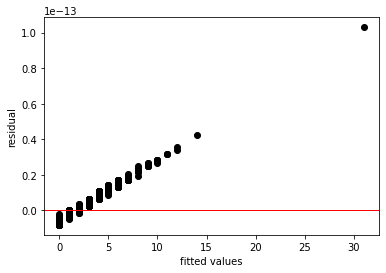

In [63]:
# Plotting the residual plot
# Residuals have been calculated by by substracting the test value from the predicted value
residuals = np.subtract(y_pred, y_test)

# Plotting the residual scatterplot
plt.scatter(y_pred, residuals, color='black')
plt.ylabel('residual')
plt.xlabel('fitted values')
plt.axhline(y= residuals.mean(), color='red', linewidth=1)
plt.show()

In [0]:
# Performing the barlett's test
test_result, p_value = sp.stats.bartlett(y_pred, residuals)

In [66]:
# Calculating the critical value of the chi squared distribution, to compare it with the test_result
degrees_of_freedom = len(y_pred) - 1
probability =  1 - p_value
critical_value = sp.stats.chi2.ppf(probability, degrees_of_freedom)

if (test_result > critical_value):
  print('The variances are heterogenous')
else:  
  print('The variances are homogeneous')

The variances are homogeneous


Logistic

In [67]:
# Selecting the relevant features for the logistic regression model
log_total = total_df[['home_team', 'away_team', 'home_score', 'away_score', 'tournament', 'year', 'home_rank', 'away_rank', 'result']]

# Previewing the first five rows of the data
log_total.head()

,home_team,away_team,home_score,away_score,tournament,year,home_rank,away_rank,result
0,Colombia,Paraguay,0,0,FIFA World Cup qualification,1993,19,67,Draw
2,Argentina,Paraguay,0,0,FIFA World Cup qualification,1993,5,67,Draw
4,Colombia,Argentina,2,1,FIFA World Cup qualification,1993,19,5,Win
7,Peru,Argentina,0,1,FIFA World Cup qualification,1993,70,5,Lose
10,Paraguay,Argentina,1,3,FIFA World Cup qualification,1993,67,5,Lose


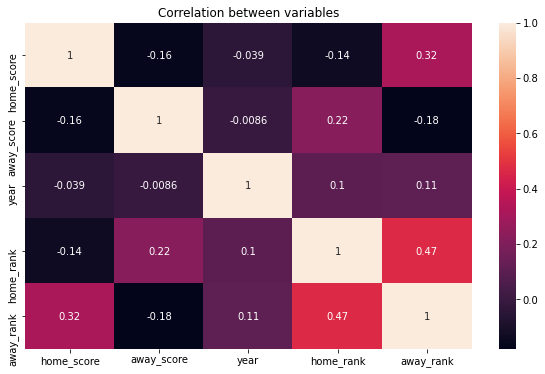

In [75]:
# Checking for correlations between features
#
plt.figure(figsize = (10, 6))
sns.heatmap(log_total.corr(), annot = True) 
plt.title('Correlation between variables')
plt.show()

In [68]:

# Spliting the data into features and the target variable
X = log_total.drop('result', axis = 1)
y = log_total.result

# Encoding the categorical features
X = pd.get_dummies(X, drop_first=True)

# Spliting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 101)

# Instantiating the model and training the model
logistic = LogisticRegression()
logistic.fit(X_train, y_train)

# Test and Training Scores
score = logistic.score(X_train, y_train)
score2 = logistic.score(X_test, y_test)

print(f'Training set accuracy: {score}')
print(f'Test set accuracy: {score2}')

# Making predictions
y_pred = logistic.predict(X_test)

Training set accuracy:  0.896
Test set accuracy:  0.903


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [70]:
# confsion matrix
print(confusion_matrix(y_pred,y_test))

[[ 830  214    0]
 [  32  906    0]
 [ 162    0 2072]]


In [0]:
# Creating a dictioanry of parameters to be tuned
params = {'C': [1.0, 5.0],
         'penalty': ['l1', 'l2']}

logistic = LogisticRegression()

# Creating a cross validation of 10 folds
kfold = KFold(n_splits = 10)

# Using grid search to find the optimal parameters
grid_search = GridSearchCV(estimator=logistic, param_grid = params, cv = kfold)

# Fitting the grid search 
grid_search_results = grid_search.fit(X, y)

# Displaying the best parameters and the the best score
print(f'Best score is {grid_search.best_score_}')